In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Question 1: 
In the first part, you estimate $\pi$ (the mathematical constant) by using a **Direct Sampling Algorithm** and determine the **Statistical Error** of your numerical calculation.

### Pi value Estimation

In [2]:
# I'm going to randomly sample points in the square of side 1 unit with uniform random sampling.

N = int(1e6)

points_square = np.random.random((N, 2))

In [3]:
# Check points in circe of diameter 1 unit.

idx = ((points_square - 0.5)**2).sum(axis=-1) < (0.5)**2

points_circle = points_square[idx]

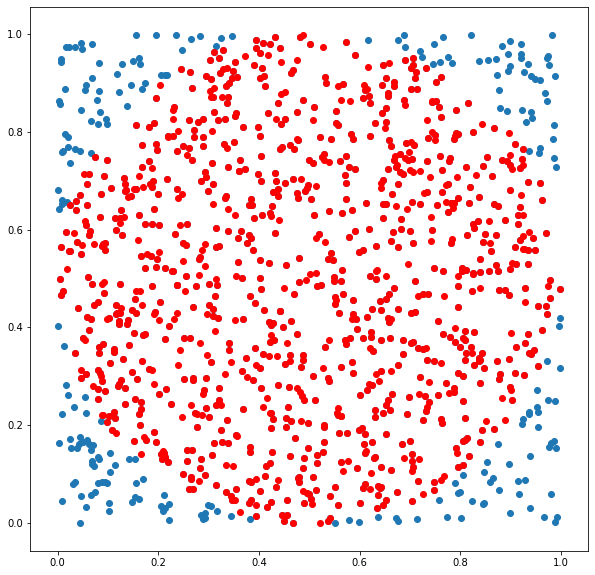

In [4]:
plt.rcParams['figure.figsize'] = 10, 10

n = 1000
plt.scatter(points_square[:n, 0], points_square[:n, 1])
plt.scatter(points_circle[:n, 0], points_circle[:n, 1], color='r')
plt.show()

In [5]:
pi_value = 4 * len(points_circle) / len(points_square)

print("Estimated Pi value is: ", pi_value)

Estimated Pi value is:  3.142972


### Error Estimation

In [6]:
def monte_carlo_pi(n_run = 1, n_trials = int(1e6)):
    '''
    N: No of points to be used for sampling.
    '''
    pi_vals = []
    for i in range(n_run):
        points_square = np.random.random((n_trials, 2))
        points_circle = points_square[((points_square - 0.5)**2).sum(axis=-1) < (0.5)**2]
        pi_vals.append(4 * len(points_circle) / len(points_square))
    
    return np.array(pi_vals)

In [7]:
data = [monte_carlo_pi(n_run = 500, n_trials = int(2**x)) for x in range(1, 17)]

In [8]:
rms_error = lambda x: np.sqrt(((x - np.pi)**2).mean())

In [9]:
x = list(range(1, 17))
y = [rms_error(x) for x in data]

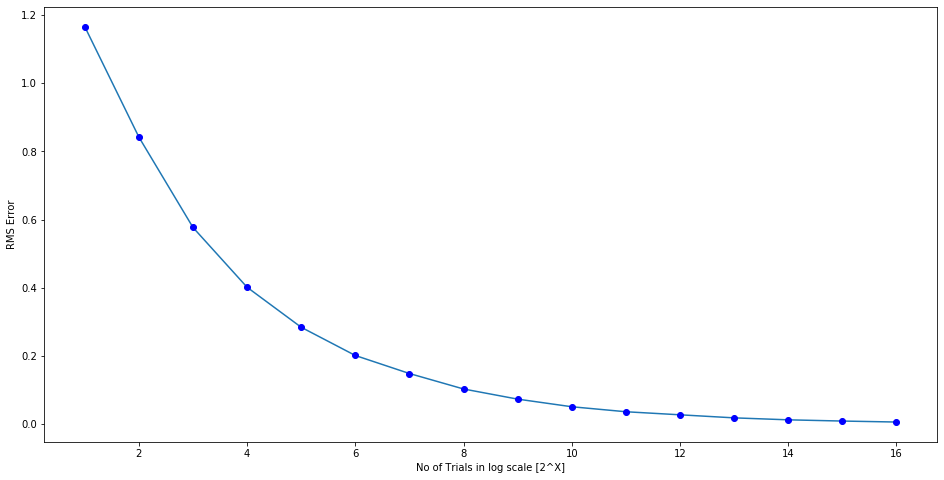

In [10]:
plt.rcParams['figure.figsize'] = 16, 8

plt.plot(x, y)
plt.plot(x, y, 'o', color='blue')
plt.xlabel("No of Trials in log scale [2^X]")
plt.ylabel("RMS Error")
plt.show()

# Question 2:

In the second part, you again estimate pi, but this time for a **Markov-chain algorithm**. The precision of the result depends on the step size delta, which itself changes the rejection rate. You will see that performance is best when delta is chosen such that about half of the proposed moves are accepted. This is called the "1/2 rule". It is a rule of thumb, not a mathematical law.

### Pi value Estimation

In [11]:
# I'm going to randomly sample points in the square of side 1 unit with uniform random sampling.

N = int(1e5)

points_square = []
seed_point = np.random.uniform(size=(1, 2))

for x in range(N):
    update = np.random.uniform(low=-1.0, high=1.0, size=(1, 2))
    new_point = seed_point + update
    if np.max(new_point) <= 1.0 and np.min(new_point) >= 0.0:
        points_square.append(new_point)
        seed_point = new_point
    
points_square = np.squeeze(np.array(points_square))

In [12]:
# Check points in circe of diameter 1 unit.

idx = ((points_square - 0.5)**2).sum(axis=-1) < (0.5)**2

points_circle = points_square[idx]

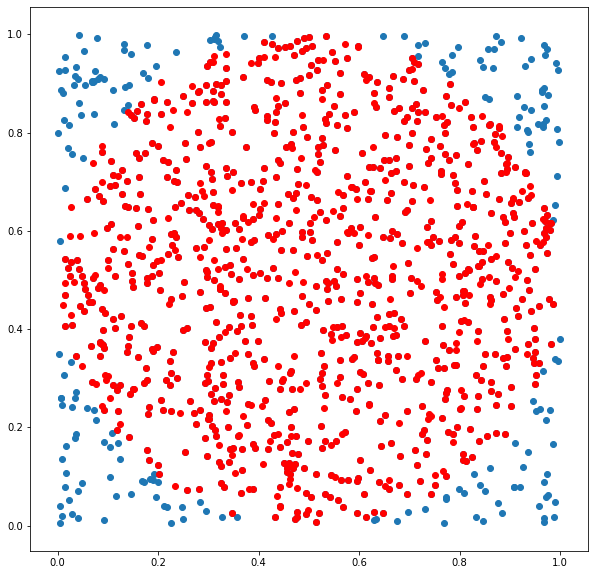

In [13]:
plt.rcParams['figure.figsize'] = 10, 10

n = 1000
plt.scatter(points_square[:n, 0], points_square[:n, 1])
plt.scatter(points_circle[:n, 0], points_circle[:n, 1], color='r')
plt.show()

In [14]:
pi_value = 4 * len(points_circle) / len(points_square)

print("Estimated Pi value is: ", pi_value)

Estimated Pi value is:  3.1568917891028465


### Error Estimation

In [15]:
import random, math, pylab

In [16]:
def markov_pi(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits

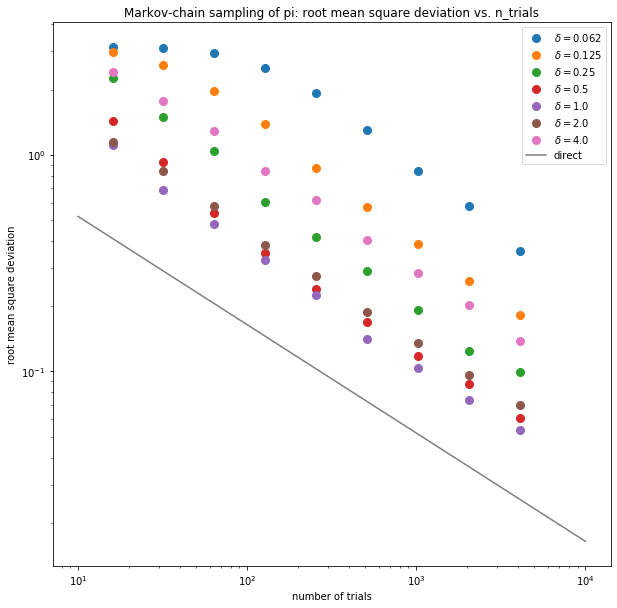

In [24]:
n_runs = 500

for delta in [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]:
    n_trials_list = []
    sigmas = []
    for poweroftwo in range(4, 13):
        n_trials = 2 ** poweroftwo
        sigma = 0.0
        for run in range(n_runs):
            n_hits = markov_pi(n_trials, delta)
            pi_est = 4.0 * n_hits / float(n_trials)
            sigma += (pi_est - math.pi) ** 2        
        sigmas.append(math.sqrt(sigma/(n_runs)))
        n_trials_list.append(n_trials)    
    pylab.plot(n_trials_list, sigmas, 'o', ms = 8, label = '$\delta = $' + str(delta))

pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.plot([10,10000],[1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)], label = 'direct')
pylab.title('Markov-chain sampling of pi: root mean square deviation vs. n_trials')
pylab.legend(loc='upper right')
pylab.savefig('markov_sampling_rms_deviation.png')
pylab.show()

In [36]:
def acceptance_rate(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
            n_hits += 1

    return n_hits/N

In [49]:
acc_rts = {float(2**x): acceptance_rate(2**14, 2**x) for x in range(-4, 3)}

print("Delta  || Acceptance Rate")
for x in acc_rts:
    print("{:.04f} || {:.13f} ".format(x, acc_rts[x]))

Delta  || Acceptance Rate
0.0625 || 0.9741210937500 
0.1250 || 0.9321899414062 
0.2500 || 0.8865356445312 
0.5000 || 0.7681274414062 
1.0000 || 0.5582885742188 
2.0000 || 0.2567749023438 
4.0000 || 0.0632934570312 


In [ ]:
# At higher delata values large number of samples will be rejected.
# At lower delta values chain will nt be able to explore the whole space effectively.

# Hence delta value is a better choice than other values of delta. This can be verfied from the 
# last plot where the loss is least for the 1.0 as compared to other delta values.